# Titanic Survival Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

### Getting the train data

In [2]:
df_train = pd.read_csv("titanic/train.csv")

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.shape

(891, 12)

### Getting the test data

In [5]:
df_test = pd.read_csv("titanic/test.csv")

In [6]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df_test.shape

(418, 11)

### Appending the two data sets

In [8]:
df_whole = df_train.append(df_test)

# 1. Data exploration

In [9]:
df_whole.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### What does it means our data?             
####                                                                 Survival: 0 = No, 1=Yes

####                                                                 Pclass: 1st = Upper,  2nd = Middle,  3rd = Lower

####                                                                 Sibsp: # of siblings / spouses aboard the Titanic

####                                                                 Parch: # of parents / children aboard the Titanic

####                                                                 Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown,  S = Southampton

### Let's take a look at the type of each column

In [10]:
df_whole.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_whole.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Let's see how some features influence the survival rate.  But, first let's see the total survival rate

In [12]:
df_train['Survived'].sum() / df_train['Survived'].count()

0.3838383838383838

### 1.1 How does the age influence the survival rate

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


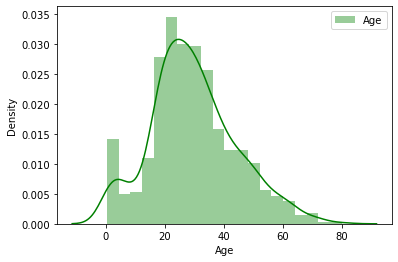

In [13]:
sns.distplot( df_train['Age'] ,  label='Age', color='g')
plt.legend(prop={'size': 10})

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Lilosa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


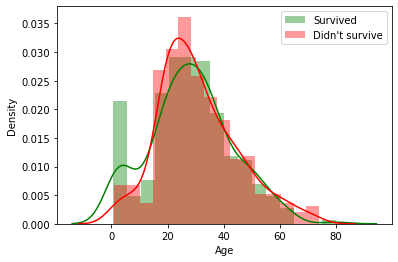

In [14]:
sns.distplot( df_train[df_train['Survived']==1]['Age'] , kde=True, label='Survived', color='g')
sns.distplot( df_train[df_train['Survived']==0]['Age'] , kde=True, label='Didn\'t survive', color='r')

plt.legend(prop={'size': 10})

##### Seems that around the media value there were equal chances of survive or not.

##### Let's do a more specific exploration about the extrem cases. Let's do first a boxplot to see the age distribution.  

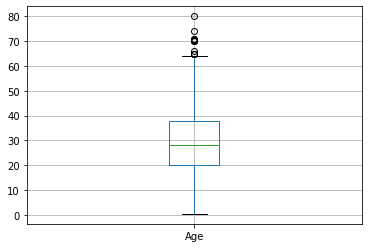

In [15]:
df_train.boxplot(column=['Age'])

##### Since the mean age is around 30 aprox. let's see how many older people where on Ttitanic

### a) Old people

##### Now let's count for people above 60 years

In [16]:
(df_train['Age'] > 60).sum()

22

##### Seems there where not so many old people on board Titanic

##### How it is the rate of survivale of older people

In [17]:
df_old = df_train[df_train['Age'] >= 60]
df_old['Survived'].sum() / len(df_old['Survived'])

0.2692307692307692

##### How the gender influenciate for old people

In [18]:
df_old.groupby('Sex')['Survived'].mean()

Sex
female    1.000000
male      0.136364
Name: Survived, dtype: float64

##### The sex was decisive for survival in old people 

### b) Young people

##### How it is the rate of survival of younger people

In [19]:
df_yo = df_train[df_train['Age'] <= 20]
df_yo['Survived'].sum() / len(df_yo['Survived'])

0.4581005586592179

##### Already the rate of survival is larger for young people than for older people

##### How the gender influenciate for young people

In [20]:
df_yo.groupby('Sex')['Survived'].mean()

Sex
female    0.688312
male      0.284314
Name: Survived, dtype: float64

##### As well, the sex was decisive for survival in young people 

### c) Kids

##### How is the rate of survival for kids

In [21]:
df_ki = df_train[df_train['Age'] <= 10]
df_ki['Survived'].sum() / len(df_ki['Survived'])

0.59375

##### How the gender influenciate for kids

In [22]:
df_ki.groupby('Sex')['Survived'].mean()

Sex
female    0.612903
male      0.575758
Name: Survived, dtype: float64

### 1.2 How does the sex influence the survival rate

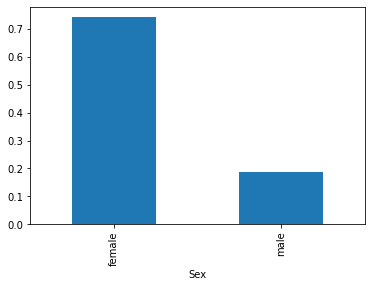

In [23]:
df_train.groupby('Sex')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

##### In general more woman survived than men

##### Which is the mean age for each gender

In [24]:
df_train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

##### How the sex and the age influence in the survival rate?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 <a list of 88 Text major ticklabel objects>)

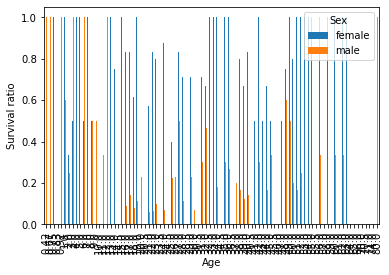

In [25]:
fig, ax1 = plt.subplots()
df_train.pivot_table(index='Age', columns='Sex', 
               values='Survived', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Survival ratio')
plt.xticks(rotation=90)

##### Seems that for men, the age was decisive for survival than for woman 

### 1.3 How does the class influence the survival rate

/Users/Lilosa/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


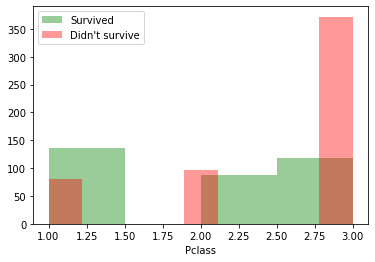

In [26]:
sns.distplot(df_train[df_train['Survived']==1]['Pclass'], kde=False, label='Survived', color = 'g')
sns.distplot(df_train[df_train['Survived']==0]['Pclass'], kde=False, label='Didn\'t survive', color = 'r')

plt.legend(prop={'size': 10})

##### More people in the 1st class survived

##### How it is the survival rate per class and per sex 

Text(0, 0.5, 'Survival ratio')

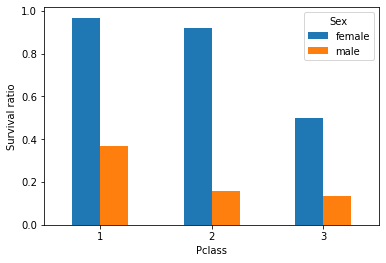

In [27]:
fig, ax1 = plt.subplots()
df_train.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Survival ratio')

##### The tendency seen in the plot above is still reflected here, both genders had less probability to survive just due to the class that they belong. However we can see that still the rate survival for woman in each class is way larger than for men.

### 1.4 How does the embarked place influence the survival rate¶

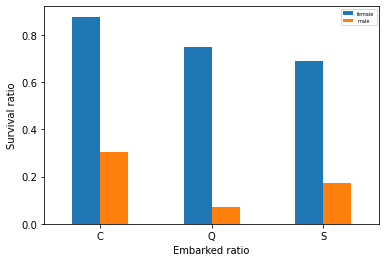

In [28]:
fig, ax1 = plt.subplots()
df_train.pivot_table(index='Embarked', columns='Sex', 
               values='Survived', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Survival ratio',fontsize=10)
ax1.set_xlabel('Embarked ratio',fontsize=10)
plt.legend(prop={'size': 5})

### 1.5 How does the number of siblings / spouses aboard the Titanic influence the survival rate

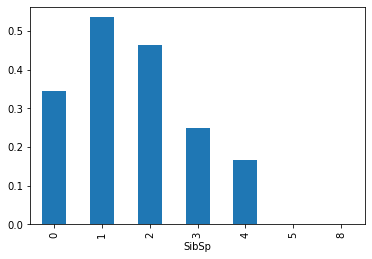

In [29]:
df_train.groupby('SibSp')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### 1.6 How does the number of parents / children aboard the Titanic influence the survival rate

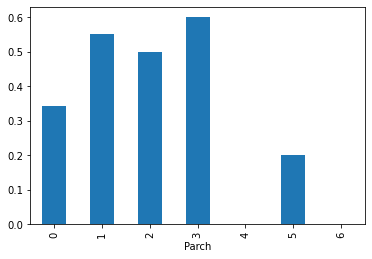

In [30]:
df_train.groupby('Parch')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

##### It is better to gather in only one column all the information related to the number of family members, we will name  this column Famsize. 

In [31]:
df_whole['Famsize'] = df_whole['SibSp'] + df_whole['Parch']

### 1.7 How does the family size aboard the Titanic influence the survival rate¶

Text(0.5, 0, 'Family size')

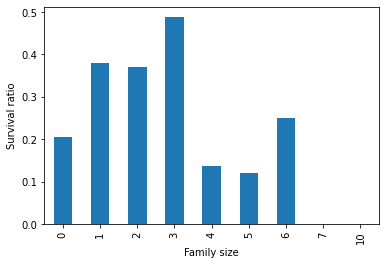

In [32]:
ax=df_whole.groupby('Famsize')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')
ax.set_ylabel('Survival ratio',fontsize=10)                                                      
ax.set_xlabel('Family size',fontsize=10) 

##### The rate of survival increases as the family size increases till family size equal to 4. Let's see how was the size of the family accoding to the class

In [33]:
df_whole.groupby('Pclass')[['Famsize']].mean()

,Famsize
Pclass,
1,0.801858
2,0.761733
3,0.968970


##### Looks like the class did no influenced the number of family member on board

### 1.8 Let see if there is any correlation between the different columns, like that we can ommit any redundant information

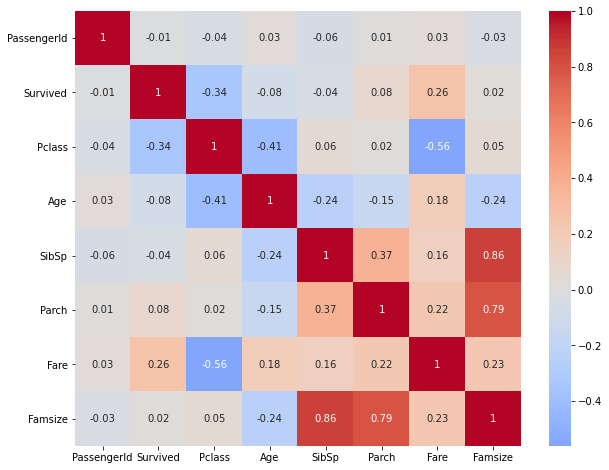

In [34]:
correlation_matrix = df_whole.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

##### We see an expected correlation between Pclass and Fare, which is something expected

### Conclusion: Seems that the features that impact the most in the survival rate are: Age, Sex, Family size, Pclass and Embarked.

### 1.9 Getting more information out of the others columns

In [35]:
df_whole_new = df_whole.copy()

##### Get the title from the name of the passengers.

In [36]:
df_whole_new['Title'] = df_whole_new['Name'].str.split(',',expand=True)[1].str.split('.', expand=True)[0] #It break out string in the place where it finds the character and the expand=true is to put it in a multidimension list 

In [37]:
df_whole_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Famsize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [38]:
df_whole_new['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Sir               1
 Mme               1
 Jonkheer          1
 the Countess      1
 Capt              1
 Don               1
 Lady              1
 Dona              1
Name: Title, dtype: int64

##### Mr. a title used before a surname or full name to address or refer to a man without a higher or honorific or professional title.

##### Mrs. the title used before a surname or full name to address or refer to a married woman without a higher or honorific or professional title.

##### Miss is an English language honorific traditionally used only for an unmarried woman (not using another title such as "Doctor" or "Dame"). Originating in the 17th century, it is a contraction of mistress, which was used for all women.

##### Master is a title for an underage male. If a person is under 18, master would be used. Once a person turns 18 and enters adulthood, mister would be used.

##### The term Mlle and Mme are equivalent to Miss and Mrs respectively, we will use the six most common titles, replacing all other titles with the most appropriate of these six.

In [39]:
mapping = {' Mlle': ' Miss', ' Major': ' Mr', ' Col': ' Mr', ' Sir': ' Mr',
           ' Don': ' Mr', ' Mme': ' Mrs', ' Jonkheer': ' Mr', ' Lady': ' Mrs',
           ' Capt': ' Mr', ' the Countess': ' Mrs', ' Ms': ' Miss', ' Dona' : ' Mrs'}
df_whole_new.replace({'Title': mapping}, inplace=True)

In [40]:
df_whole_new['Title'].value_counts()

 Mr        767
 Miss      264
 Mrs       201
 Master     61
 Dr          8
 Rev         8
Name: Title, dtype: int64

###### How the class for each Title

In [41]:
df_whole_new.groupby('Title')[['Pclass']].mean()

,Pclass
Title,
Dr,1.250000
Master,2.655738
Miss,2.337121
Mr,2.363755
Mrs,1.920398
Rev,2.000000


Text(0, 0.5, 'Survival ratio')

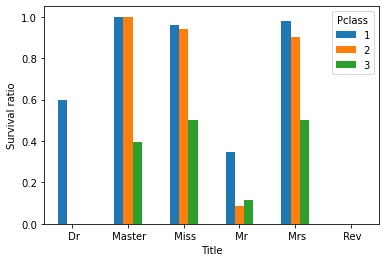

In [42]:
fig, ax1 = plt.subplots()
df_whole_new.pivot_table(index='Title', columns='Pclass', 
               values='Survived', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Survival ratio')

###### How is the age for each Title

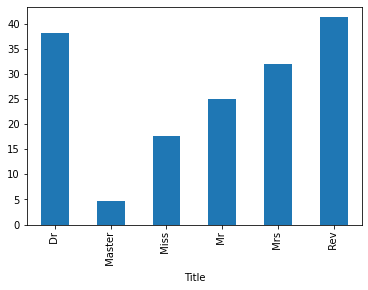

In [43]:
df_whole_new.groupby('Title')['Age'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

# 2. Missing values 

In [44]:
columns_all_nans = df_train.isna().sum()
columns_all_nans

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#####  We have 3 columns with missing value: Age, Cabin and Embarked. It is important to notice that the Cabin column has 687 missing values out of 891, so more than half of the information it is missed. Plus, the Cabin column does not bring any meaninfull information. Therefore it is better to droop the whole column. 

# 3. Imputation techniques

In [45]:
df_whole_imp = df_whole_new.copy()

In [46]:
df_whole_imp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Famsize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


### 3.1  Cabin column 

#####  First, droop the Cabin column beacause is not of use

In [47]:
df_whole_imp.drop(columns=['Cabin'], inplace=True)

### 3.2 Embarked column 

##### For the Embarked column we use the Pandas 'backfill' method.

In [48]:
df_whole_imp['Embarked'].fillna(method='backfill', inplace=True)

### 3.3 Age column

##### For the Age column, first it is important to see how it is his distribution

Text(0.5, 1.0, 'Age histogram')

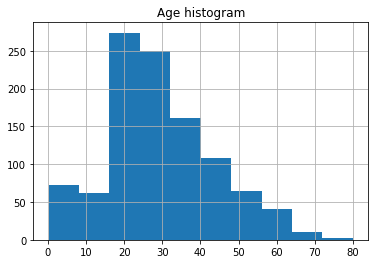

In [49]:
df_whole_imp['Age'].hist().set_title('Age histogram')

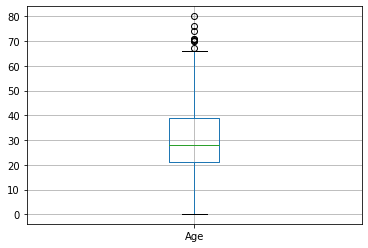

In [50]:
df_whole_imp.boxplot(column=['Age'])

In [51]:
df_whole_imp['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

##### From the plot we can see that the age of the passengers is normally distributed, so one option is to replace the missing values with the mean of the normal distribution. However, since we have 177 out of 891 missing values (almost 20 % missing) it is better to use another imputation. One option is to use KNN Imputation technique. However, we can made use of the column Title, for each missing age value, we will impute the age using the median age for all people with the same title.

##### First we create a dictionary that contains the title and the median corresponding age

In [52]:
title_ages = dict(df_whole_imp.groupby('Title')['Age'].median())

##### Let's create a new column with all the correspondent median age values

In [53]:
df_whole_imp['Med Age'] = df_whole_imp['Title'].apply(lambda x: title_ages[x]) 

##### The replace the missing values with the mediam value in the created column

In [54]:
df_whole_imp['Age'].fillna(df_whole_imp['Med Age'], inplace=True, )

In [55]:
df_whole_imp.drop(columns=['Med Age'], inplace= True)

In [56]:
df_whole_imp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Famsize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


Text(0.5, 1.0, 'Age histogram')

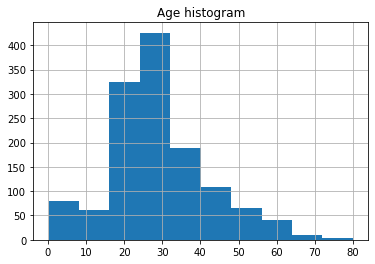

In [57]:
df_whole_imp['Age'].hist().set_title('Age histogram')

# 4. Droop redundant or useless information

##### There is some columns that will give not significant information as it is Ticket and  Fare. Some other from which we already extract informtation in other column as it is Name, SibSp and Parch.

In [58]:
df_whole_imp.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], inplace= True)

In [59]:
df_whole_imp.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Famsize,Title
0,1,0.0,3,male,22.0,S,1,Mr
1,2,1.0,1,female,38.0,C,1,Mrs
2,3,1.0,3,female,26.0,S,0,Miss
3,4,1.0,1,female,35.0,S,1,Mrs
4,5,0.0,3,male,35.0,S,0,Mr


# 5. Convertion of categorical columns

##### Let's conver the columns: sex, embarked into continuous values. To do so, we can make use of one hot enconder or create “dummy variables”. The idea is to convert each category into a binary data column by assigning a 1 or 0, this is posible because with this dataset we will not have the problem of dimensionality. First, we will make a list of categorical variables with text data and generate dummy variables by using ‘.get_dummies’ attribute of Pandas data frame package. An important caveat here is we are setting “drop_first” parameters as True in order to prevent the Dummy Variable Trap. 

In [60]:
categorical_var = df_whole_imp[['Sex','Embarked','Title']]
categorical_dummies = pd.get_dummies(categorical_var,)

In [61]:
categorical_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev
0,0,1,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0


In [62]:
df_whole_imp.drop(['Sex', 'Embarked','Title'], axis=1, inplace= True)
df_whole_imp=pd.concat([df_whole_imp, categorical_dummies], axis=1)

In [63]:
df_whole_imp.head()

,PassengerId,Survived,Pclass,Age,Famsize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev
0,1,0.0,3,22.0,1,0,1,0,0,1,0,0,0,1,0,0
1,2,1.0,1,38.0,1,1,0,1,0,0,0,0,0,0,1,0
2,3,1.0,3,26.0,0,1,0,0,0,1,0,0,1,0,0,0
3,4,1.0,1,35.0,1,1,0,0,0,1,0,0,0,0,1,0
4,5,0.0,3,35.0,0,0,1,0,0,1,0,0,0,1,0,0


In [64]:
df_whole_imp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Famsize', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Dr',
       'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs',
       'Title_ Rev'],
      dtype='object')

# 6. Machine Learning Models 

### 6.1 Model that does not need to be normalize

#### a) Split the initial test and the train dataset after preprocesing 

In [65]:
df_train_ml = df_whole_imp[0:891]

In [66]:
df_test_ml = df_whole_imp[891:]

#### b) Defining X and y

In [67]:
X = df_train_ml[['Age','Sex_male','Sex_female','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Famsize','Title_ Dr',
       'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs',
       'Title_ Rev']] .values
y = df_train_ml['Survived'].values

#### c) Splitting train and test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (668, 14) (668,)
Test set: (223, 14) (223,)


### a) Random Forest 

##### Testing the hyperparameters

In [69]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    rf_titanic = RandomForestClassifier(criterion='gini', 
                        n_estimators=10000,
                        max_depth=n,
                        min_samples_split=2,
                        min_samples_leaf=2,
                        max_features=None,
                        oob_score='auto',
                        random_state=1400,
                        n_jobs=-1).fit(X_train,y_train)
 
    random_Forest_predictionmetier = rf_titanic.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, random_Forest_predictionmetier)

    std_acc[n-1]=np.std(random_Forest_predictionmetier==y_test)/np.sqrt(random_Forest_predictionmetier.shape[0])

mean_acc

array([0.76681614, 0.80269058, 0.81165919, 0.8206278 , 0.81165919,
       0.8161435 , 0.8161435 , 0.8206278 , 0.8206278 , 0.8206278 ,
       0.82511211, 0.82511211, 0.8206278 , 0.82511211])

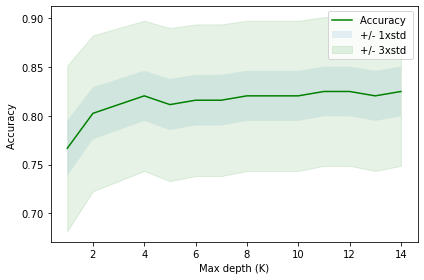

In [70]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.show()

##### Modeling

In [97]:
rf_titanic = RandomForestClassifier(criterion='gini', 
                        n_estimators=300,
                        max_depth=4,
                        min_samples_split=4,
                        min_samples_leaf=7,
                        max_features='auto',
                        oob_score=True,
                        random_state=1400,
                        n_jobs=-1)

rf_titanic.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=1400)

##### Prediction

In [98]:
random_Forest_predictionmetier = rf_titanic.predict(X_test)

##### Evaluation

In [123]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_train, rf_titanic.predict(X_train)))

Random Forest's Accuracy:  0.8218562874251497


In [124]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, random_Forest_predictionmetier))

Random Forest's Accuracy:  0.8565022421524664


### 6.2 Model that need to be normalized

In [101]:
df_whole_mod = df_whole_imp.copy()

#### a) Normalizing 

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

In [104]:
df_whole_mod[['Age','Sex_male','Sex_female','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Famsize','Title_ Dr','Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs','Title_ Rev']] = scaler.fit_transform(df_whole_mod[['Age','Sex_male','Sex_female','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Famsize','Title_ Dr','Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs','Title_ Rev']])

##### Convert to a DataFrame

In [105]:
df_nor = pd.DataFrame(df_whole_mod)

In [106]:
df_nor.head()

,PassengerId,Survived,Pclass,Age,Famsize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev
0,1,0.0,1.0,0.273456,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,1.0,0.0,0.473882,0.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1.0,1.0,0.323563,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1.0,0.0,0.436302,0.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,1.0,0.436302,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### b) Getting the initia test and the train dataset after preprocesing 

In [107]:
df_train_mod = df_nor[0:891]

In [108]:
df_test_mod = df_nor[891:]

#### c) Defining X and y

In [109]:
X = df_train_mod[['Age','Sex_male','Sex_female','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass', 'Famsize','Title_ Dr',
       'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs',
       'Title_ Rev']] .values
y = df_train_mod['Survived'].values

#### d) Splitting train and test split

In [110]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (668, 14) (668,)
Test set: (223, 14) (223,)


### a) Logistic Regression

##### Modeling

In [111]:
LR_titanic = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

##### Prediction

In [112]:
Linear_Regression_predictiontitanic = LR_titanic.predict(X_test)

##### Evaluation

In [113]:
print("Train Logistic Regression's Accuracy: ", metrics.accuracy_score(y_train, LR_titanic.predict(X_train)))

Train Logistic Regression's Accuracy:  0.781437125748503


In [114]:
print("Test Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, Linear_Regression_predictiontitanic))

Test Logistic Regression's Accuracy:  0.8026905829596412


### b) K-Nearest Neighbors

##### Testing the hyperparameters

In [115]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_neigh=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_neigh)

    
    std_acc[n-1]=np.std(yhat_neigh==y_test)/np.sqrt(yhat_neigh.shape[0])

mean_acc

array([0.79820628, 0.82511211, 0.8206278 , 0.84753363, 0.83408072,
       0.82959641, 0.83408072, 0.83408072, 0.83856502])

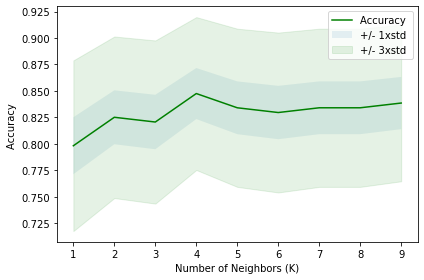

In [116]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

###### Modeling

In [117]:
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

##### Prediction

In [118]:
yhat_neigh=neigh.predict(X_test)

##### Evaluation

In [119]:
print("Train KNN's Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train KNN's Accuracy:  0.8502994011976048


In [125]:
print("Test KNN's Accuracy: ", metrics.accuracy_score(y_test,yhat_neigh))

Test KNN's Accuracy:  0.8475336322869955


### c) Deep Lerning 

###### Modeling

In [121]:
import tensorflow as tf
import tensorflow.keras as keras

seed = 1400

tf.random.set_seed(seed)
my_init = keras.initializers.glorot_uniform(seed=seed)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(360, activation='selu', kernel_initializer=my_init))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(360, activation='selu', kernel_initializer=my_init))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(360, activation='selu', kernel_initializer=my_init))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss = keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, mode='max', restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=3, mode='max', min_lr=0)
model.fit(X_train, y_train, epochs = 50, batch_size = 2, verbose = 1)
#model.fit(X_train, y_train, epochs = 50, batch_size = 2, callbacks=[reduce_lr, early_stopping], verbose = 1)
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print('\nValidation accuracy:', val_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 360)               5400      
_________________________________________________________________
dropout_2 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 360)               129960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 361       
Total params: 265,681
Trainable params: 265,681
Non-trainable params: 0
________________________________________________

# Conclusion:  The best accuracy was obtained by the Deep Learning model